Channel 0, record 0 samples acquired: 1,000



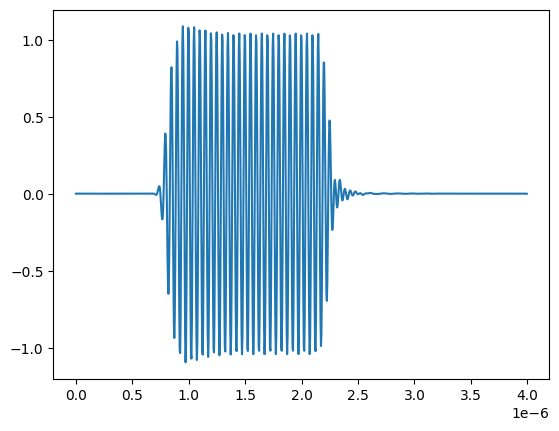

In [72]:
import niscope as ni
import matplotlib.pyplot as plt
import numpy as np
#import Card_Class
 # 250 MHz MAX


# Molto probabilmente serve niscope.Session.acq_arm_source per comandare i trigger, perché c'è in tutte le opzioni dei trigger di readthedocs di niscope



#RICORDARSI DEL NOME!!!!!
with ni.Session("Pippo") as session: # Name of the device
    session.channels[0].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    # #session.channels[1].configure_vertical(range=4.0, coupling=ni.VerticalCoupling.DC)
    # # session.channels[2].configure_vertical(range=4.0, coupling=ni.VerticalCoupling.DC)
    session.configure_horizontal_timing(min_sample_rate=250e6, min_num_pts=1000, ref_position=0, num_records=1, enforce_realtime=True)
    session.configure_trigger_digital(trigger_source = 'VAL_PFI_0' , slope = ni.TriggerSlope.POSITIVE, holdoff=0, delay=0)
    '''
    min_sample_rate:        Boh
    min_num_pts:            Number of points in the record
    ref_position:
    num records:            The number of records to acquire
    enforce_realtime:
    '''
    with session.initiate():
        # waveforms = session.channels[0,1].fetch()

        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))

a = waveforms[0].samples.tolist()

plt.plot(np.arange(len(a))/250e6, a)


Channel 0, record 0 samples acquired: 1,000



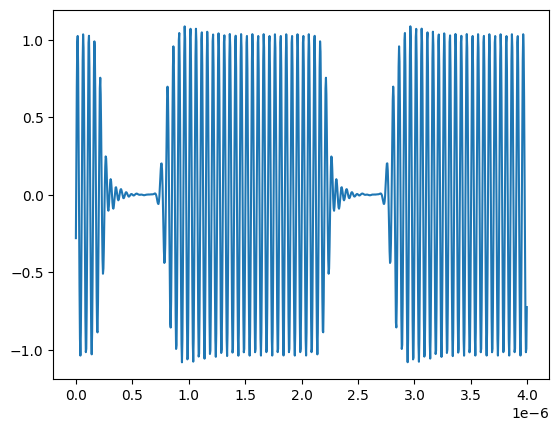

In [68]:
import niscope as ni
import matplotlib.pyplot as plt
import numpy as np
#import Card_Class
 # 250 MHz MAX


# Molto probabilmente serve niscope.Session.acq_arm_source per comandare i trigger, perché c'è in tutte le opzioni dei trigger di readthedocs di niscope



#RICORDARSI DEL NOME!!!!!
with ni.Session("Pippo") as session: # Name of the device
    session.channels[0].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    # #session.channels[1].configure_vertical(range=4.0, coupling=ni.VerticalCoupling.DC)
    # # session.channels[2].configure_vertical(range=4.0, coupling=ni.VerticalCoupling.DC)
    session.configure_horizontal_timing(min_sample_rate=250e6, min_num_pts=int(1000), ref_position=0, num_records=1, enforce_realtime=True)
    session.configure_trigger_digital(trigger_source = 'VAL_PFI_0' , slope = ni.TriggerSlope.POSITIVE, holdoff=0, delay=0)
    '''
    min_sample_rate:        Boh
    min_num_pts:            Number of points in the record
    ref_position:
    num records:            The number of records to acquire
    enforce_realtime:
    '''
    with session.initiate():
        # waveforms = session.channels[0,1].fetch()

        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))

a = waveforms[0].samples.tolist()

plt.plot(np.arange(len(a))/250e6, a)

Channel 0, record 0 samples acquired: 1,000

Channel 0, record 1 samples acquired: 1,000

Channel 0, record 2 samples acquired: 1,000



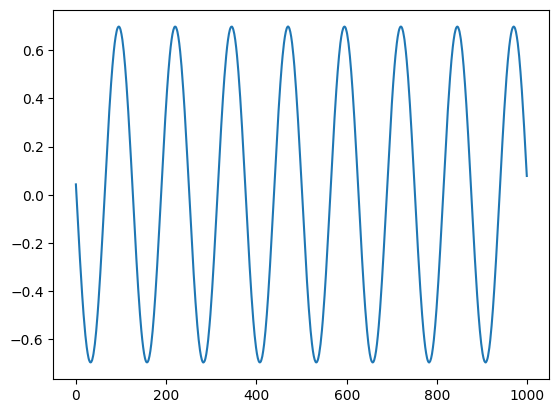

In [55]:
import niscope as ni
import matplotlib.pyplot as plt

voltage_range = 2 # MAX 5V
n_pts = 1000
n_recs = 3

with ni.Session("Pippo") as session: # Name of the device
    session.channels[0].configure_vertical(range = voltage_range, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate = 250e6, min_num_pts = n_pts, ref_position = 50.0, num_records = n_recs, enforce_realtime = True)
    with session.initiate(): # After calling this method, the digitizer leaves the Idle state and waits for a trigger
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
         print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))

a = waveforms[0].samples.tolist()

plt.plot(a)


In [10]:
a = ['0','1']
b = {'0':21312,'1':213,'2':1321}

b[a]

TypeError: unhashable type: 'list'